In [ ]:
import numpy as np
import pandas as pd
import csv
import pickle
import os
import scipy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
import seaborn as sns
from keras.utils import np_utils
from keras.layers import LSTM, BatchNormalization
import tensorflow
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import gc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# enable gpu
from keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

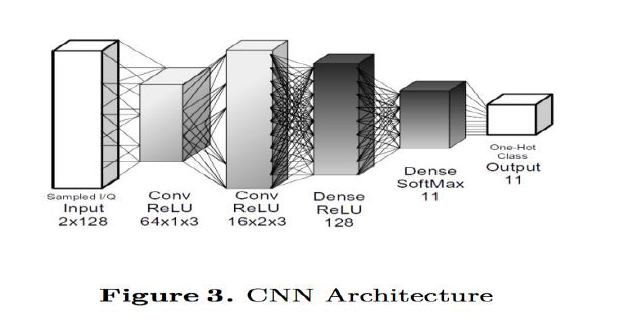

In [ ]:
def split_tuple(labels):
  label, snr = map(list, zip(*(x.split('_') for x in labels)))
  label,snr=np.array(label),np.array(snr)
  return label,snr

In [ ]:
def create_model():
  number_of_channels = 4
  cnn_model = Sequential()
  
  cnn_model.add(Conv2D(64, (1,3),padding='same',input_shape=(128, number_of_channels,1), activation='relu'))

  cnn_model.add(Conv2D(16, (2,3),padding='same',activation='relu'))

  cnn_model.add(BatchNormalization())
  
  cnn_model.add(Flatten())
  cnn_model.add(Dropout(0.5))

  cnn_model.add(Dense(128, activation ='relu'))

  cnn_model.add(Dense(10, activation ='softmax'))

  

  return cnn_model

In [ ]:
# load pre-saved data
samples = np.load('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/integral.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/labels.npy')
gc.collect()

180

In [ ]:
# to encode the labels
lb = LabelEncoder()

# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(samples, labels,test_size=0.3, random_state=1 ,stratify=labels)
del samples
del labels
# take 5% of training set for validation 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.05, random_state=1,stratify=y_train)

y_train,snr_train = split_tuple(y_train)
y_test,snr_test = split_tuple(y_test)
y_val,snr_val=split_tuple(y_val)

# encode labels
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_val_lb = np_utils.to_categorical(lb.fit_transform(y_val))

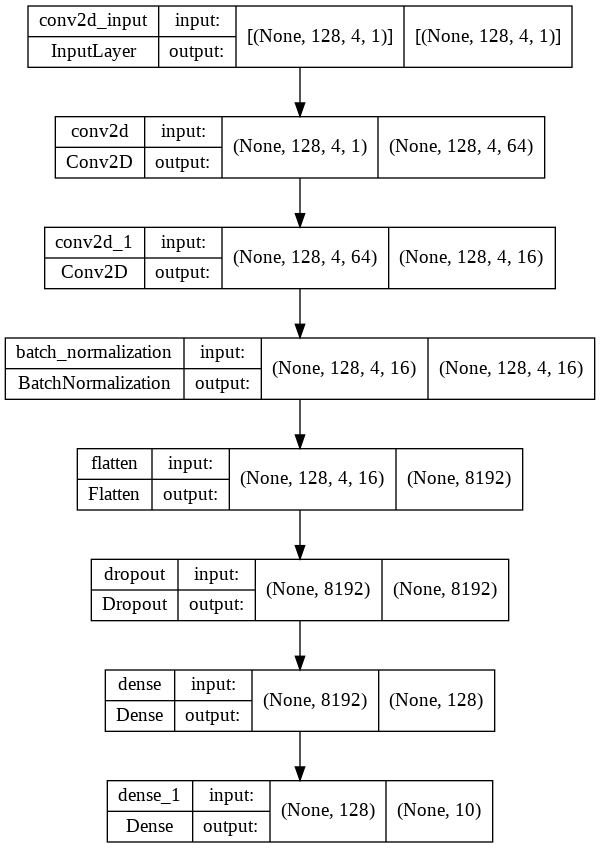

In [ ]:
# create model
model = create_model()
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam', metrics = ['accuracy'])

# Save an image of the model's architecture to a file
plot_model(model, to_file='Feed Forward NN.png', show_shapes=True, show_layer_names=True)

Learning rate: 0.1
Epoch 1/100
24938/24938 [==============================] - 126s 5ms/step - loss: 2.4367 - accuracy: 0.1004 - val_loss: 2.3353 - val_accuracy: 0.1000
Epoch 2/100
24938/24938 [==============================] - 110s 4ms/step - loss: 2.3154 - accuracy: 0.0999 - val_loss: 2.3201 - val_accuracy: 0.1000
Epoch 3/100
24938/24938 [==============================] - 111s 4ms/step - loss: 2.3153 - accuracy: 0.1002 - val_loss: 2.3168 - val_accuracy: 0.1000
Epoch 4/100
24938/24938 [==============================] - 110s 4ms/step - loss: 2.3151 - accuracy: 0.1002 - val_loss: 2.3289 - val_accuracy: 0.1000
Epoch 5/100
24938/24938 [==============================] - 111s 4ms/step - loss: 2.3155 - accuracy: 0.0999 - val_loss: 2.3113 - val_accuracy: 0.1000
Epoch 6/100
24938/24938 [==============================] - 111s 4ms/step - loss: 2.3154 - accuracy: 0.0996 - val_loss: 2.3186 - val_accuracy: 0.1000


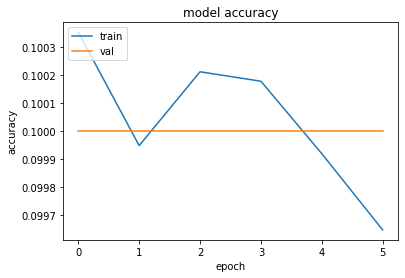

**************************************************


Learning rate: 0.01
Epoch 1/100
24938/24938 [==============================] - 111s 4ms/step - loss: 2.3046 - accuracy: 0.0998 - val_loss: 2.3038 - val_accuracy: 0.1000
Epoch 2/100
24938/24938 [==============================] - 113s 5ms/step - loss: 2.3039 - accuracy: 0.0999 - val_loss: 2.3039 - val_accuracy: 0.1000
Epoch 3/100
24938/24938 [==============================] - 113s 5ms/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3045 - val_accuracy: 0.1000
Epoch 4/100
24938/24938 [==============================] - 109s 4ms/step - loss: 2.3039 - accuracy: 0.0999 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 5/100
24938/24938 [==============================] - 109s 4ms/step - loss: 2.3039 - accuracy: 0.1001 - val_loss: 2.3036 - val_accuracy: 0.1000
Epoch 6/100
24938/24938 [==============================] - 110s 4ms/step - loss: 2.3039 - accuracy: 0.1001 - val_loss: 2.3035 - val_accuracy: 0.1000


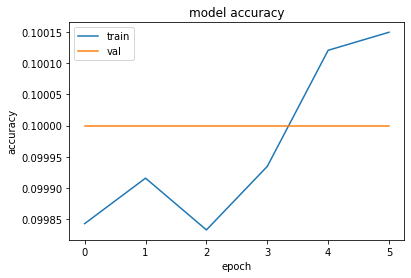

**************************************************


Learning rate: 0.001
Epoch 1/100
24938/24938 [==============================] - 111s 4ms/step - loss: 1.6922 - accuracy: 0.3317 - val_loss: 1.7938 - val_accuracy: 0.3009
Epoch 2/100
24938/24938 [==============================] - 110s 4ms/step - loss: 1.6259 - accuracy: 0.3520 - val_loss: 2.2419 - val_accuracy: 0.2107
Epoch 3/100
24938/24938 [==============================] - 110s 4ms/step - loss: 1.6017 - accuracy: 0.3610 - val_loss: 2.4469 - val_accuracy: 0.2523
Epoch 4/100
24938/24938 [==============================] - 110s 4ms/step - loss: 1.5767 - accuracy: 0.3706 - val_loss: 1.7446 - val_accuracy: 0.3359
Epoch 5/100
24938/24938 [==============================] - 108s 4ms/step - loss: 1.4830 - accuracy: 0.4070 - val_loss: 2.3945 - val_accuracy: 0.2540
Epoch 6/100
24938/24938 [==============================] - 110s 4ms/step - loss: 1.4271 - accuracy: 0.4242 - val_loss: 1.4456 - val_accuracy: 0.4192
Epoch 7/100
24938/24938 [=======

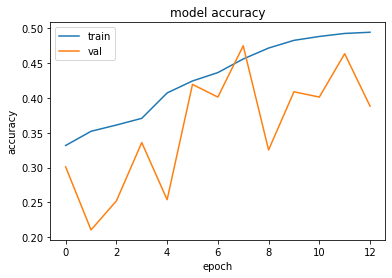

**************************************************


Learning rate: 0.0001
Epoch 1/100
24938/24938 [==============================] - 111s 4ms/step - loss: 1.4379 - accuracy: 0.4140 - val_loss: 1.2479 - val_accuracy: 0.4796
Epoch 2/100
24938/24938 [==============================] - 108s 4ms/step - loss: 1.1994 - accuracy: 0.4955 - val_loss: 1.1770 - val_accuracy: 0.5076
Epoch 3/100
24938/24938 [==============================] - 109s 4ms/step - loss: 1.1548 - accuracy: 0.5138 - val_loss: 1.1171 - val_accuracy: 0.5257
Epoch 4/100
24938/24938 [==============================] - 108s 4ms/step - loss: 1.1260 - accuracy: 0.5272 - val_loss: 1.1139 - val_accuracy: 0.5319
Epoch 5/100
24938/24938 [==============================] - 110s 4ms/step - loss: 1.1086 - accuracy: 0.5344 - val_loss: 1.0971 - val_accuracy: 0.5399
Epoch 6/100
24938/24938 [==============================] - 111s 4ms/step - loss: 1.0935 - accuracy: 0.5424 - val_loss: 1.0872 - val_accuracy: 0.5415
Epoch 7/100
24938/24938 [======

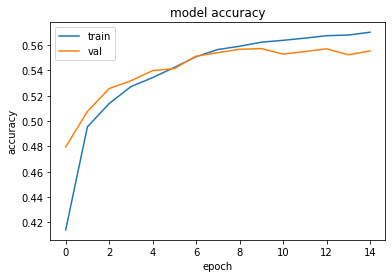

**************************************************


Learning rate: 1e-05
Epoch 1/100
24938/24938 [==============================] - 113s 4ms/step - loss: 1.9519 - accuracy: 0.2486 - val_loss: 1.7816 - val_accuracy: 0.3053
Epoch 2/100
24938/24938 [==============================] - 110s 4ms/step - loss: 1.7464 - accuracy: 0.3148 - val_loss: 1.6397 - val_accuracy: 0.3559
Epoch 3/100
24938/24938 [==============================] - 110s 4ms/step - loss: 1.6262 - accuracy: 0.3580 - val_loss: 1.5305 - val_accuracy: 0.4049
Epoch 4/100
24938/24938 [==============================] - 112s 5ms/step - loss: 1.5291 - accuracy: 0.3951 - val_loss: 1.4331 - val_accuracy: 0.4418
Epoch 5/100
24938/24938 [==============================] - 113s 5ms/step - loss: 1.4470 - accuracy: 0.4249 - val_loss: 1.3752 - val_accuracy: 0.4454
Epoch 6/100
24938/24938 [==============================] - 112s 5ms/step - loss: 1.3880 - accuracy: 0.4439 - val_loss: 1.3326 - val_accuracy: 0.4576
Epoch 7/100
24938/24938 [=======

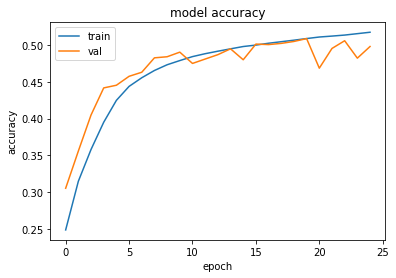

**************************************************


Learning rate: 1e-06
Epoch 1/100
24938/24938 [==============================] - 112s 4ms/step - loss: 2.1653 - accuracy: 0.1716 - val_loss: 2.1152 - val_accuracy: 0.1987
Epoch 2/100
24938/24938 [==============================] - 111s 4ms/step - loss: 2.0948 - accuracy: 0.2065 - val_loss: 2.0630 - val_accuracy: 0.2260
Epoch 3/100
24938/24938 [==============================] - 113s 5ms/step - loss: 2.0413 - accuracy: 0.2281 - val_loss: 1.9993 - val_accuracy: 0.2480
Epoch 4/100
24938/24938 [==============================] - 111s 4ms/step - loss: 1.9805 - accuracy: 0.2465 - val_loss: 1.9324 - val_accuracy: 0.2648
Epoch 5/100
24938/24938 [==============================] - 112s 4ms/step - loss: 1.9238 - accuracy: 0.2614 - val_loss: 1.8757 - val_accuracy: 0.2785
Epoch 6/100
24938/24938 [==============================] - 111s 4ms/step - loss: 1.8787 - accuracy: 0.2733 - val_loss: 1.8316 - val_accuracy: 0.2877
Epoch 7/100
24938/24938 [=======

In [ ]:
#tuning on different learning rates
gc.collect()
rates = [1e-1,1e-2,1e-3,1e-4,1e-5]
epochs = 100
path = '/content/drive/MyDrive/Colab Notebooks/pattern/lab4/data/cnn/'
checkpoint_filepath = path+'checkpoint_drop_integral_cnn'
model_checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
for lr in rates:
  print("Learning rate:",lr)
  model = create_model()
  callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
  opt = tensorflow.keras.optimizers.Adam(learning_rate=lr)
  model.compile(loss = 'categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])

  # train model
  cnn_results = model.fit(x_train, y_train_lb,
                  epochs = epochs,
                  verbose = 1,
                  validation_data = (x_val, y_val_lb),callbacks=[callback,model_checkpoint_callback])
  # Plot model accuracy over ephocs
  plt.plot(cnn_results.history['accuracy'])
  plt.plot(cnn_results.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.savefig(path+'drop_integral_cnn'+f'lr_{str(lr)}.png')
  plt.show()
  print("**************************************************\n\n")
  gc.collect()


Epoch 1/50
24938/24938 [==============================] - 125s 5ms/step - loss: 1.4757 - accuracy: 0.4011 - val_loss: 1.2119 - val_accuracy: 0.4929
Epoch 2/50
24938/24938 [==============================] - 109s 4ms/step - loss: 1.2230 - accuracy: 0.4868 - val_loss: 1.2732 - val_accuracy: 0.4695
Epoch 3/50
24938/24938 [==============================] - 109s 4ms/step - loss: 1.1772 - accuracy: 0.5039 - val_loss: 1.1404 - val_accuracy: 0.5144
Epoch 4/50
24938/24938 [==============================] - 108s 4ms/step - loss: 1.1516 - accuracy: 0.5140 - val_loss: 1.1260 - val_accuracy: 0.5219
Epoch 5/50
24938/24938 [==============================] - 106s 4ms/step - loss: 1.1345 - accuracy: 0.5211 - val_loss: 1.1171 - val_accuracy: 0.5269
Epoch 6/50
24938/24938 [==============================] - 108s 4ms/step - loss: 1.1198 - accuracy: 0.5281 - val_loss: 1.1235 - val_accuracy: 0.5177
Epoch 7/50
24938/24938 [==============================] - 107s 4ms/step - loss: 1.1046 - accuracy: 0.5367 - val_

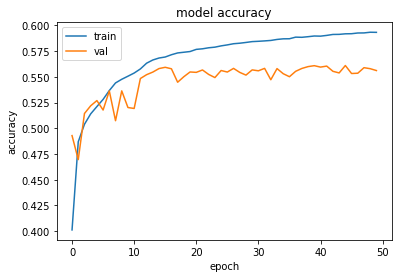

4995

In [ ]:
#training on best learning rate which is 1e-4
gc.collect()
model = create_model()
opt = tensorflow.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(loss = 'categorical_crossentropy',optimizer = opt, metrics = ['accuracy'])

# train model
cnn_results = model.fit(x_train, y_train_lb,
                  epochs = 50,
                  verbose = 1,
                  validation_data = (x_val, y_val_lb))
# Plot model accuracy over ephocs
plt.plot(cnn_results.history['accuracy'])
plt.plot(cnn_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
gc.collect()

In [ ]:
# load model checkpoint
import keras
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/data/cnn/m_model.h5')

In [ ]:
# train accuracy
score = model.evaluate(x_train, y_train_lb, verbose=0)
print("Training Accuracy: ", score[1])

Training Accuracy:  0.6198295950889587


In [ ]:
# evaluate test set
# encode labels
model.save('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/data/cnn/m_model.h5')
y_test_lb = np_utils.to_categorical(lb.fit_transform(y_test))

score = model.evaluate(x_test, y_test_lb, verbose=0)
print("Testing Accuracy: ", score[1])

Testing Accuracy:  0.5556694269180298


In [ ]:
del x_train
del y_train
del y_val
del x_val
del y_train_lb
del y_val_lb
gc.collect()

1501

In [ ]:
# to get confusion matrix

y_test_classes = y_test_lb.argmax(1)
y_predicted = model.predict(x_test)
y_pred_classes = np.argmax(y_predicted,axis=1)
classes = np.load('/content/drive/MyDrive/Colab Notebooks/pattern/lab4/classes.npy')


In [ ]:
# get confusion matrix
confusion_matrix1 = confusion_matrix(y_true= y_test_classes, y_pred=y_pred_classes)
classes = np.array([x[0] for x in classes])
classes=np.unique(classes)
print(classes)
#Add labels to confusion matrix
confusion_matrix1 = pd.DataFrame(confusion_matrix1, columns=list(classes), index=list(classes))

print("The rows represents the true values or observations")
print("The columns respresent the model's predictions")

#Print confusion matrix results
confusion_matrix1

[b'8PSK' b'AM-DSB' b'BPSK' b'CPFSK' b'GFSK' b'PAM4' b'QAM16' b'QAM64'
 b'QPSK' b'WBFM']
The rows represents the true values or observations
The columns respresent the model's predictions


,b'8PSK',b'AM-DSB',b'BPSK',b'CPFSK',b'GFSK',b'PAM4',b'QAM16',b'QAM64',b'QPSK',b'WBFM'
b'8PSK',19071,1230,2443,2080,2027,290,638,481,6297,1443
b'AM-DSB',875,26320,1282,863,1223,123,28,4,1865,3417
b'BPSK',1545,1275,23226,1724,1723,1219,168,26,3749,1345
b'CPFSK',1690,1272,2117,22688,2344,262,258,77,3836,1456
b'GFSK',1190,1710,1783,1613,24150,204,77,11,2616,2646
b'PAM4',1132,1040,3424,1310,1356,23737,136,27,2803,1035
b'QAM16',2227,842,1640,1491,1348,311,5071,18137,4012,921
b'QAM64',1571,581,1139,1129,1011,293,4246,22227,3232,571
b'QPSK',3473,1369,2382,2059,1901,289,589,318,22257,1363
b'WBFM',878,18080,1340,901,1448,103,39,4,1913,11294


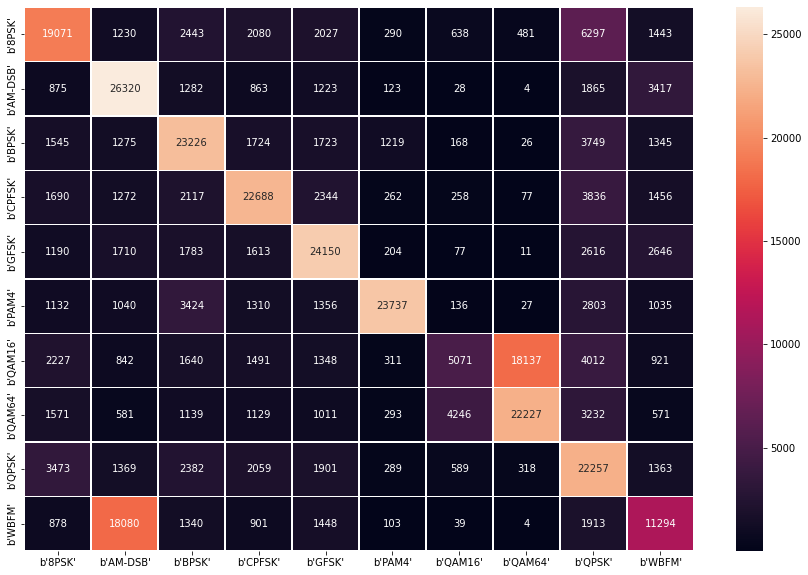

In [ ]:
# get most confusing classes
fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sns.heatmap(confusion_matrix1, annot=True, linewidths=.5, ax=ax, fmt='g')

In [ ]:
# Print f1, precision, and recall scores
print("Percision: ",precision_score(y_test_classes, y_pred_classes , average="macro"))
print("Recall: ",recall_score(y_test_classes, y_pred_classes , average="macro"))
print("F-score: ",f1_score(y_test_classes, y_pred_classes , average="macro"))

Percision:  0.5625580032273572
Recall:  0.5556694444444444
F-score:  0.5433971659479242


In [ ]:
# group by snr
snr_test = [int(snr) for snr in snr_test]
sorted_snrs = np.sort(np.unique(snr_test))
x = []
y = []
for snr in sorted_snrs:
  idx = np.where(snr_test == snr)
  x.append(snr)
  y.append(accuracy_score(np.argmax(y_test_lb[idx], axis = 1), np.argmax(y_predicted[idx], axis = 1)))


In [ ]:
# print results of snr
pd.DataFrame(data = np.array(y).reshape(1, -1) * 100,  columns = sorted_snrs, index = ['accuracy']).round(2)

,-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18
accuracy,10.52,10.6,11.43,12.76,15.93,24.53,35.37,45.22,57.3,68.14,76.43,80.81,82.23,82.76,82.6,82.99,82.91,82.81,82.92,83.08


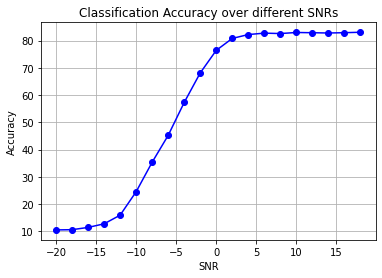

In [ ]:
# plot accuracy vs snr
plt.xlabel('SNR')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy over different SNRs')
plt.plot(x, np.array(y) * 100, 'bo-')
plt.grid(True)